<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400 >
<h1 align=center><font size = 5>Hacktiv8 Intermediate Python for Data Science</font></h1>

Project Overview

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students.

The dataset contains 1044 instances and 32 variables (most of which binary and categorical). It consists of 2 other datasets. The first provides data for students enrolled in Portuguese class. The second describes students enrolled in a math course. There is overlap between the datasets, that is some students attend both classes.

**Build an NN model for classifying whether a student has alcohol consumption problem.**

Criteria:	Meet Expectations

Neural Network:	Mengimplementasikan NN dengan Tensorflow untuk membuat Klasifikasi

Preprocessing:	Student Melakukan Preproses Dataset Sebelum Membuat Model.

Apakah Kode Berjalan Tanpa Ada Error?:	Seluruh Kode Berfungsi Dan Dibuat Dengan Benar.

# Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# EDA

In [ ]:
import pandas as pd
#studentmat = pd.read_csv('student-mat.csv')
studentmat = pd.read_csv("drive/MyDrive/Colab Notebooks/student-mat.csv")
studentmat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
#studentpor = pd.read_csv('student-por.csv')
studentpor = pd.read_csv("drive/MyDrive/Colab Notebooks/student-por.csv")
studentpor

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [ ]:
type(studentpor)

pandas.core.frame.DataFrame

In [ ]:
studentmat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
data = pd.concat([studentmat, studentpor], ignore_index=True)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [ ]:
#data['alcohol_consumption_problem'].value_counts(normalize=True)

In [ ]:
data.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [ ]:
obj_col = data.select_dtypes(['object']).columns
data[obj_col] = data[obj_col].apply(lambda x: pd.factorize(x)[0]) #Convert object data to int (decode)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      1044 non-null   int64
 1   sex         1044 non-null   int64
 2   age         1044 non-null   int64
 3   address     1044 non-null   int64
 4   famsize     1044 non-null   int64
 5   Pstatus     1044 non-null   int64
 6   Medu        1044 non-null   int64
 7   Fedu        1044 non-null   int64
 8   Mjob        1044 non-null   int64
 9   Fjob        1044 non-null   int64
 10  reason      1044 non-null   int64
 11  guardian    1044 non-null   int64
 12  traveltime  1044 non-null   int64
 13  studytime   1044 non-null   int64
 14  failures    1044 non-null   int64
 15  schoolsup   1044 non-null   int64
 16  famsup      1044 non-null   int64
 17  paid        1044 non-null   int64
 18  activities  1044 non-null   int64
 19  nursery     1044 non-null   int64
 20  higher      1044 non-null   in

In [ ]:
# Combine day alcohol and week alcohol
data['all_day_in_week_alc']= data['Dalc']+data['Walc']
data['all_day_in_week_alc'].value_counts()

2     391
3     182
4     159
5     118
6      85
7      49
8      26
10     24
9      10
Name: all_day_in_week_alc, dtype: int64

In [ ]:
data['all_day_in_week_alc'].value_counts()

2     391
3     182
4     159
5     118
6      85
7      49
8      26
10     24
9      10
Name: all_day_in_week_alc, dtype: int64

In [ ]:
data['ave_grade'] = round((data.G1 + data.G2 + data.G3)/3, 2)

0    850
1    194
Name: alcohol_consumption_problem, dtype: int64
0    0.814176
1    0.185824
Name: alcohol_consumption_problem, dtype: float64


Text(0.5, 1.0, 'Distribution of those with and without alcohol consumption problem')

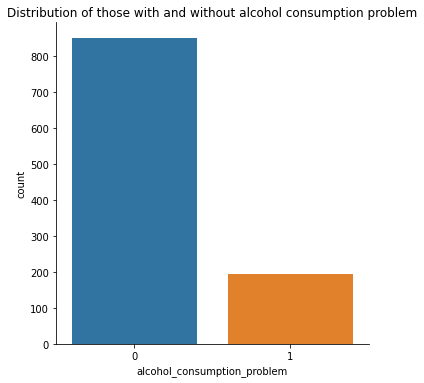

In [ ]:
# thresshold for student with alcohol consumption problem is > 5
data['alcohol_consumption_problem'] = [0 if x <= 5 else 1 for x in data['all_day_in_week_alc']] 
        
print(data['alcohol_consumption_problem'].value_counts())
print(data['alcohol_consumption_problem'].value_counts(normalize = True))

sns.catplot(x="alcohol_consumption_problem", kind="count", data=data)
plt.title('Distribution of those with and without alcohol consumption problem')

In [ ]:
# Correlation alcohol consumption problem with other features
data.corrwith(data['alcohol_consumption_problem'])

school                         0.019389
sex                            0.312146
age                            0.097649
address                        0.077611
famsize                        0.071077
Pstatus                        0.019115
Medu                          -0.035194
Fedu                          -0.016259
Mjob                           0.015064
Fjob                           0.016477
reason                        -0.056473
guardian                       0.039138
traveltime                     0.099463
studytime                     -0.198551
failures                       0.149118
schoolsup                      0.047370
famsup                        -0.090640
paid                           0.024870
activities                     0.010417
nursery                        0.074853
higher                         0.101075
internet                       0.014103
romantic                      -0.030565
famrel                        -0.048963
freetime                       0.131313


In [ ]:
type(data.corrwith(data['alcohol_consumption_problem'], method='pearson').index.astype(str))

pandas.core.indexes.base.Index

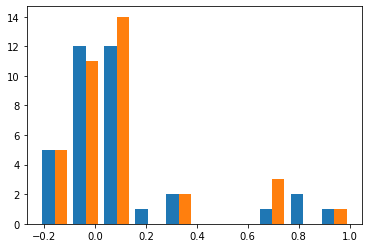

In [ ]:
plt.hist([data.corrwith(data['alcohol_consumption_problem']).values, 
          data.corrwith(data['alcohol_consumption_problem'], method='spearman').values])
plt.show()

In [ ]:
# plt.hist(y=[data.corrwith(data['alcohol_consumption_problem']).values, 
#           data.corrwith(data['alcohol_consumption_problem'], method='spearman').values],
#          x=)
# plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   school                       1044 non-null   int64  
 1   sex                          1044 non-null   int64  
 2   age                          1044 non-null   int64  
 3   address                      1044 non-null   int64  
 4   famsize                      1044 non-null   int64  
 5   Pstatus                      1044 non-null   int64  
 6   Medu                         1044 non-null   int64  
 7   Fedu                         1044 non-null   int64  
 8   Mjob                         1044 non-null   int64  
 9   Fjob                         1044 non-null   int64  
 10  reason                       1044 non-null   int64  
 11  guardian                     1044 non-null   int64  
 12  traveltime                   1044 non-null   int64  
 13  studytime         

In [ ]:
data.shape

(1044, 36)

In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,all_day_in_week_alc,ave_grade,alcohol_consumption_problem
0,0,0,18,0,0,0,4,4,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,4,3,4,1,1,3,6,5,6,6,2,5.67,0
1,0,0,17,0,0,1,1,1,0,1,0,1,1,2,0,1,1,0,0,1,0,1,0,5,3,3,1,1,3,4,5,5,6,2,5.33,0
2,0,0,15,0,1,1,1,1,0,1,1,0,1,2,3,0,0,1,0,0,0,1,0,4,3,2,2,3,3,10,7,8,10,5,8.33,0
3,0,0,15,0,0,1,4,2,1,2,2,0,1,3,0,1,1,1,1,0,0,1,1,3,2,2,1,1,5,2,15,14,15,2,14.67,0
4,0,0,16,0,0,1,3,3,2,1,2,1,1,2,0,1,1,1,0,0,0,0,0,4,3,2,1,2,5,4,6,10,10,3,8.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,19,1,0,1,2,3,3,1,0,0,1,3,1,1,0,0,1,1,0,1,0,5,4,2,1,2,5,4,10,11,10,3,10.33,0
1040,1,0,18,0,1,1,3,1,4,2,0,0,1,2,0,1,1,0,0,0,0,1,0,4,3,4,1,1,1,4,15,15,16,2,15.33,0
1041,1,0,18,0,0,1,1,1,2,1,0,0,2,2,0,1,0,0,1,0,0,0,0,1,1,1,1,1,5,6,11,12,9,2,10.67,0
1042,1,1,17,0,1,1,3,1,3,2,0,0,2,1,0,1,0,0,0,1,0,1,0,2,4,5,3,4,2,6,10,10,10,7,10.00,1


In [ ]:
y = data['alcohol_consumption_problem']
y

0       0
1       0
2       0
3       0
4       0
       ..
1039    0
1040    0
1041    0
1042    1
1043    1
Name: alcohol_consumption_problem, Length: 1044, dtype: int64

In [ ]:
X = data
X = X.drop('alcohol_consumption_problem', axis=1)
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,all_day_in_week_alc,ave_grade
0,0,0,18,0,0,0,4,4,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,4,3,4,1,1,3,6,5,6,6,2,5.67
1,0,0,17,0,0,1,1,1,0,1,0,1,1,2,0,1,1,0,0,1,0,1,0,5,3,3,1,1,3,4,5,5,6,2,5.33
2,0,0,15,0,1,1,1,1,0,1,1,0,1,2,3,0,0,1,0,0,0,1,0,4,3,2,2,3,3,10,7,8,10,5,8.33
3,0,0,15,0,0,1,4,2,1,2,2,0,1,3,0,1,1,1,1,0,0,1,1,3,2,2,1,1,5,2,15,14,15,2,14.67
4,0,0,16,0,0,1,3,3,2,1,2,1,1,2,0,1,1,1,0,0,0,0,0,4,3,2,1,2,5,4,6,10,10,3,8.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,19,1,0,1,2,3,3,1,0,0,1,3,1,1,0,0,1,1,0,1,0,5,4,2,1,2,5,4,10,11,10,3,10.33
1040,1,0,18,0,1,1,3,1,4,2,0,0,1,2,0,1,1,0,0,0,0,1,0,4,3,4,1,1,1,4,15,15,16,2,15.33
1041,1,0,18,0,0,1,1,1,2,1,0,0,2,2,0,1,0,0,1,0,0,0,0,1,1,1,1,1,5,6,11,12,9,2,10.67
1042,1,1,17,0,1,1,3,1,3,2,0,0,2,1,0,1,0,0,0,1,0,1,0,2,4,5,3,4,2,6,10,10,10,7,10.00


# Splitting Data

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=150)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=150)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
# class_names = [data['alcohol_consumption_problem'].value_counts().index]

class_names=['no alcohol problem', 'alcohol problem']

In [ ]:
#checking the shape of the training set and test set
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape,)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape,)
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

Training set - Features:  (587, 35) Target:  (587,)
Test set - Features:  (261, 35) Target:  (261,)
0    0.805792
1    0.194208
Name: alcohol_consumption_problem, dtype: float64
0    0.842912
1    0.157088
Name: alcohol_consumption_problem, dtype: float64


Fix Class Imbalance

In [ ]:
# separate minority and majority classes
no_problem = data[data.alcohol_consumption_problem==0]
alc_problem = data[data.alcohol_consumption_problem==1]

# Get a class count to understand the class imbalance.
print('no_problem count: '+ str(len(no_problem)))
print('alc_problem count: '+ str(len(alc_problem)))

no_problem count: 850
alc_problem count: 194


In [ ]:
from sklearn.utils import resample

In [ ]:
# upsample minority: alcohol problem
alc_problem_upsampled = resample(alc_problem,
                          replace=True, # sample with replacement
                          n_samples=len(no_problem), # match number in majority class
                          random_state=23) # reproducible results
alc_problem_upsampled.shape

(850, 36)

In [ ]:
# combine majority and upsampled minority
upsampled = pd.concat([no_problem, alc_problem_upsampled])
# upsampled
# check new class counts
upsampled.alcohol_consumption_problem.value_counts()

1    850
0    850
Name: alcohol_consumption_problem, dtype: int64

In [ ]:
y_train_up = upsampled.alcohol_consumption_problem
X_train_up = upsampled.drop(columns = 'alcohol_consumption_problem', axis=1)
X_train_up.shape

# print(y_train_u.value_counts(normalize = True))
# print(X_train_u.value_counts(normalize = True))

(1700, 35)

# Resplit data

Resplit Data

In [ ]:
# from keras.utils import to_categorical 

X_train_full, X_test, y_train_full, y_test = train_test_split(X_train_up, y_train_up, random_state=150)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=150)

# # Skipped for binary
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_valid = scaler.transform(X_valid)
# X_test = scaler.transform(X_test)

# # y_train=to_categorical(y_train)
# # y_test=to_categorical(y_test)

In [ ]:
X_valid.shape

(319, 35)

# Build Model

In [ ]:
# Need Encoding

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape[1:]

(35,)

In [ ]:
# All Feature
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

Epoch 1/100
30/30 [==============================] - 1s 9ms/step - loss: 0.2213 - accuracy: 0.5890 - val_loss: 0.2107 - val_accuracy: 0.5517
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.2106 - accuracy: 0.5753 - val_loss: 0.1985 - val_accuracy: 0.5831
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 0.1971 - accuracy: 0.5965 - val_loss: 0.1888 - val_accuracy: 0.5893
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 0.1820 - accuracy: 0.5889 - val_loss: 0.1779 - val_accuracy: 0.6019
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 0.1799 - accuracy: 0.5956 - val_loss: 0.1709 - val_accuracy: 0.6176
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 0.1743 - accuracy: 0.6306 - val_loss: 0.1634 - val_accuracy: 0.6144
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.1612 - accuracy: 0.6495 - val_loss: 0.1570 - val_accuracy: 0.6332
Epoch 8/100
3

[0.035045694559812546, 0.8964706063270569]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               10800     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                15050     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 52        
Total params: 27,177
Trainable params: 27,177
Non-trainable params: 0
_________________________________________________________________


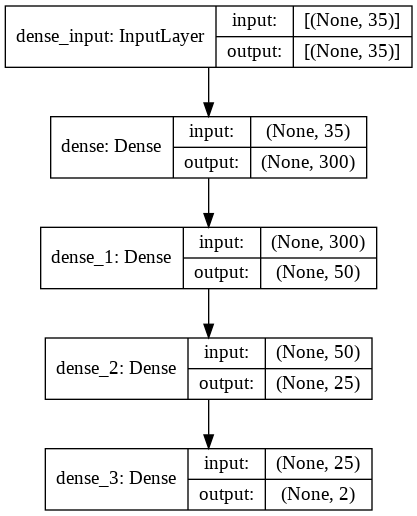

In [ ]:
model.summary()
keras.utils.plot_model(model, "my_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense_1'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
# print(weights)
# print(weights.shape)

In [ ]:
print(biases)
print(biases.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
(50,)


In [ ]:
y_train.shape

(956,)

In [ ]:
X_train.shape

(956, 35)

# Training

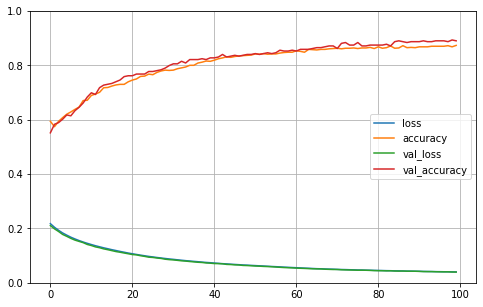

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.0450 - accuracy: 0.4071


[0.04500691965222359, 0.40705883502960205]

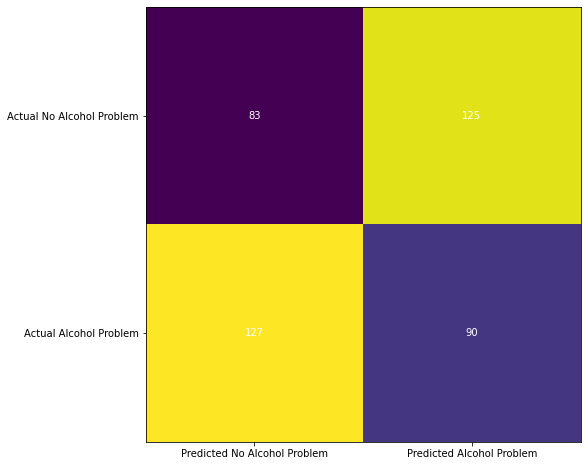

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted No Alcohol Problem', 'Predicted Alcohol Problem'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual No Alcohol Problem', 'Actual Alcohol Problem'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()